# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(weather_api_key)

663d0b439aa4a1a9b7b87ea3e47ccfea


## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
units = "imperial"

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

location = []
clouds = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
windspeed = []
record_counter = 0

for city in cities:
    
    response = requests.get(url+city).json()
    try:
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        windspeed.append(response['wind']['speed'])
        location.append(city)
        record_counter = record_counter+1
        print(f"Processing record {record_counter} | {city}")
    except KeyError:
        print(f"{city} not found... skipping!")
              
print("-----------------------------------")
print(f"Query complete. {len(location)} imported!")
print("-----------------------------------")    

worldweather = {
    "city": location,
    "cloudiness": clouds,
    "country": country,
    "date": date,
    "humidity": humidity,
    "lat": latitude,
    "long": longitude,
    "max temp": max_temp,
    "wind speed": windspeed
}

Processing record 1 | nanortalik
Processing record 2 | chuy
Processing record 3 | arraial do cabo
Processing record 4 | cabo san lucas
Processing record 5 | mataura
Processing record 6 | ushuaia
grand centre not found... skipping!
Processing record 7 | saint-philippe
Processing record 8 | monrovia
Processing record 9 | yerbogachen
Processing record 10 | yeppoon
Processing record 11 | san vicente de canete
Processing record 12 | ilulissat
Processing record 13 | bredasdorp
Processing record 14 | porto nacional
Processing record 15 | avarua
Processing record 16 | pangkalanbuun
Processing record 17 | barrow
Processing record 18 | hilo
Processing record 19 | mae sai
Processing record 20 | busselton
Processing record 21 | sola
Processing record 22 | manokwari
Processing record 23 | atuona
Processing record 24 | albany
Processing record 25 | rikitea
Processing record 26 | patnos
amderma not found... skipping!
Processing record 27 | burnie
Processing record 28 | tuktoyaktuk
Processing record 2

In [9]:
print(len(location))
print(len(clouds))
print(len(longitude))

545
545
545


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
worldweather_df = pd.DataFrame(worldweather)

worldweather_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
0,nanortalik,100,GL,1576899330,78,60.14,-45.24,26.35,9.91
1,chuy,100,UY,1576899330,97,-33.69,-53.46,69.89,3.49
2,arraial do cabo,100,BR,1576899331,90,-22.97,-42.02,75.88,22.84
3,cabo san lucas,5,MX,1576899321,82,22.89,-109.91,68.00,4.70
4,mataura,81,NZ,1576899331,68,-46.19,168.86,55.99,8.99


In [11]:
csv_file = "worldweather.csv"
export_csv = worldweather_df.to_csv(csv_file)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

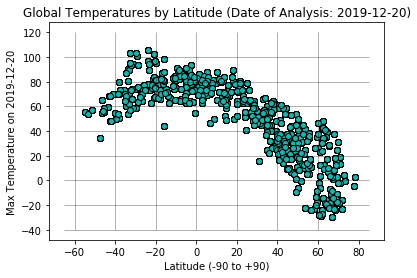

In [14]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["max temp"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")

todays_date = date.today()
#https://www.programiz.com/python-programming/datetime/current-datetime

plt.title(f"Global Temperatures by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Max Temperature on {todays_date}")

h_lines = np.arange(-40, 120, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, -40, 120, lw = 1, alpha = 0.3)

plt.savefig("global_temp_x_lat.png")

#### Latitude vs. Humidity Plot

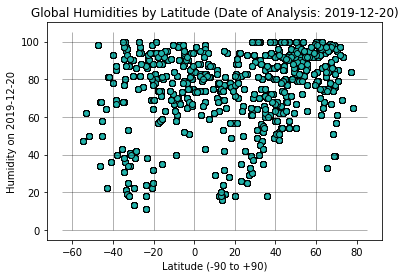

In [15]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["humidity"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Global Humidities by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Humidity on {todays_date}")

h_lines = np.arange(0, 105, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 105, lw = 1, alpha = 0.3)

plt.savefig("humidity_x_lat.png")

#### Latitude vs. Cloudiness Plot

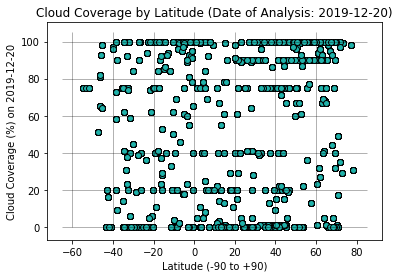

In [17]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["cloudiness"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Cloud Coverage by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Cloud Coverage (%) on {todays_date}")

h_lines = np.arange(0, 105, 20)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 105, lw = 1, alpha = 0.3)

plt.savefig("cloud_cover_x_lat.png")

#### Latitude vs. Wind Speed Plot

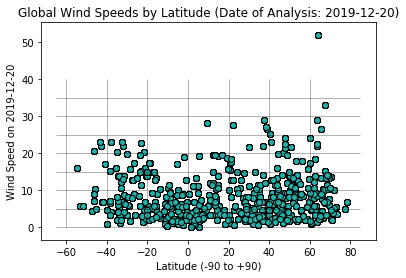

In [18]:
for place in location:
    plt.scatter(worldweather_df["lat"], worldweather_df["wind speed"], s=None, marker="o", linewidths=1, color = "lightseagreen", edgecolors="black")


plt.title(f"Global Wind Speeds (mph) by Latitude (Date of Analysis: {todays_date})")
plt.xlabel("Latitude (-90 to +90)")
plt.ylabel(f"Wind Speed on {todays_date}")

h_lines = np.arange(0, 40, 5)
v_lines = np.arange(-60, 80, 20)

plt.hlines(h_lines, -65, 85, lw = 1, alpha = 0.3)
plt.vlines(v_lines, 0, 40, lw = 1, alpha = 0.3)

plt.savefig("wind_speed_x_lat.png")

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots

def regress(xfactor, yfactor):
    (slope, intercept, rvalue, _, _) = linregress(xfactor, yfactor)
    regress_values = xfactor * slope + intercept
    equation = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    print(f"The r-squared value is: {rvalue}")
    plt.scatter(xfactor, yfactor, s=None, marker="o", color = "royalblue")
    plt.plot(xfactor, regress_values,"r-")
    plt.annotate(equation, (0,0), fontsize=15, color="red")
    plt.xlabel(xfactor.name)
    plt.ylabel(yfactor.name)
    plt.title(f"{xfactor.name} by {yfactor.name}")
    plt.show()
    

In [65]:
# Create Northern and Southern Hemisphere DataFrames
#Note that this doesn't copy anything on the equator (if there is in fact anything on the equator in the dataset)
#https://stackoverflow.com/questions/36142959/pandas-move-rows-from-1-df-to-another-df?lq=1     
n_hemi_df = pd.DataFrame(columns=('city', 'cloudiness', 'country', 'date', 'humidity', 'lat', 'long', 'max temp', 'wind speed'))
s_hemi_df = pd.DataFrame(columns=worldweather_df.columns)

n_hemi_df = n_hemi_df.append(worldweather_df.loc[worldweather_df['lat']>0, :])
s_hemi_df = s_hemi_df.append(worldweather_df.loc[worldweather_df['lat']<0, :])

n_hemi_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
0,nanortalik,100,GL,1576899330,78,60.14,-45.24,26.35,9.91
3,cabo san lucas,5,MX,1576899321,82,22.89,-109.91,68.00,4.70
6,saint-philippe,1,CA,1576899331,71,45.36,-73.48,10.00,5.82
7,monrovia,20,LR,1576899331,94,6.33,-10.80,75.20,3.47
8,yerbogachen,32,RU,1576899331,97,61.28,108.01,-28.53,5.97


In [66]:
s_hemi_df.head()

,city,cloudiness,country,date,humidity,lat,long,max temp,wind speed
1,chuy,100,UY,1576899330,97,-33.69,-53.46,69.89,3.49
2,arraial do cabo,100,BR,1576899331,90,-22.97,-42.02,75.88,22.84
4,mataura,81,NZ,1576899331,68,-46.19,168.86,55.99,8.99
5,ushuaia,75,AR,1576899331,47,-54.81,-68.31,55.40,16.11
9,yeppoon,0,AU,1576899331,38,-23.13,150.74,89.60,11.41


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.8488383113797989


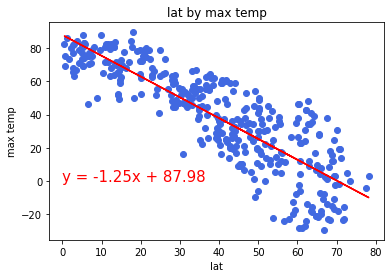

In [67]:
regress(n_hemi_df['lat'], n_hemi_df['max temp'])

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: 0.4050716693506259


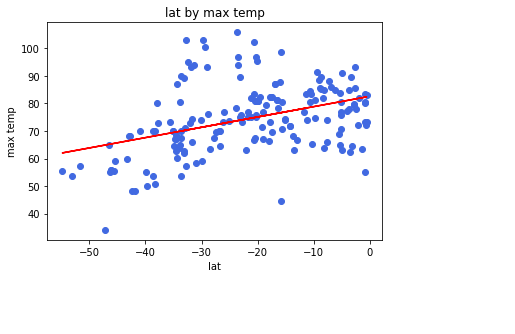

In [68]:
regress(s_hemi_df['lat'], s_hemi_df['max temp'])

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [71]:
regress(n_hemi_df['lat'], n_hemi_df['humidity'])

AttributeError: 'float' object has no attribute 'shape'

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression